In [181]:
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [182]:
#read dataset
dataframe = pandas.read_csv("C:/Users/Katta's/PycharmProjects/data/usecase2/heart.csv")


In [183]:
x = dataframe.drop(['target'], axis=1)
y = dataframe['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=7)

In [184]:
x_train.var()

age           89.804321
sex            0.223870
cp             1.073648
trestbps     309.149198
chol        3007.639419
fbs            0.130030
restecg        0.290689
thalach      499.022485
exang          0.230015
oldpeak        1.402369
slope          0.399746
ca             1.126908
thal           0.365459
dtype: float64

In [185]:
x_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [186]:
y_train.isnull().sum()

0

In [187]:
ss = StandardScaler()
x_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

c:\users\katta's\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\katta's\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\katta's\venv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [188]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

In [189]:
# scaling whole data for auto splitting
x_scaled_total_data = ss.fit_transform(x)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y_total_data = encoder.transform(y)
print(encoded_Y_total_data.shape)
print(x_scaled_total_data.shape)

(303,)
(303, 13)


c:\users\katta's\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\katta's\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [256]:
model = Sequential()
model.add(Dense(14, activation='relu', name='input'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [257]:
# history = model.fit(x_scaled, encoded_Y, epochs=150, batch_size=10)
history = model.fit(x_scaled_total_data, encoded_Y_total_data, validation_split=0.20,epochs=150)
# history = model.fit(x_scaled_total_data, encoded_Y_total_data, validation_split=0.30,epochs=100, batch_size=10, verbose=1, shuffle=True)

Train on 242 samples, validate on 61 samples
Epoch 1/150


 32/242 [==>...........................] - ETA: 6s - loss: 0.7120 - acc: 0.3438

242/242 [==============================] - 1s 5ms/step - loss: 0.7050 - acc: 0.5372 - val_loss: 0.7337 - val_acc: 0.3115


Epoch 2/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.6775 - acc: 0.5938

242/242 [==============================] - 0s 90us/step - loss: 0.6858 - acc: 0.5950 - val_loss: 0.7365 - val_acc: 0.3607


Epoch 3/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.6512 - acc: 0.6875

242/242 [==============================] - 0s 110us/step - loss: 0.6698 - acc: 0.6198 - val_loss: 0.7390 - val_acc: 0.3770


Epoch 4/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.6513 - acc: 0.5312

242/242 [==============================] - 0s 107us/step - loss: 0.6526 - acc: 0.6446 - val_loss: 0.7387 - val_acc: 0.4098


Epoch 5/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.6548 - acc: 0.6875

242/242 [==============================] - 0s 129us/step - loss: 0.6370 - acc: 0.6942 - val_loss: 0.7404 - val_acc: 0.4098


Epoch 6/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.6214 - acc: 0.7500

242/242 [==============================] - 0s 119us/step - loss: 0.6210 - acc: 0.7314 - val_loss: 0.7395 - val_acc: 0.4590


Epoch 7/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.6120 - acc: 0.7500



242/242 [==============================] - 0s 124us/step - loss: 0.6050 - acc: 0.7686 - val_loss: 0.7366 - val_acc: 0.4918


Epoch 8/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.6164 - acc: 0.7812

242/242 [==============================] - 0s 115us/step - loss: 0.5881 - acc: 0.7727 - val_loss: 0.7343 - val_acc: 0.5246


Epoch 9/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.5761 - acc: 0.7500

242/242 [==============================] - 0s 111us/step - loss: 0.5700 - acc: 0.7893 - val_loss: 0.7309 - val_acc: 0.5082


Epoch 10/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.6383 - acc: 0.6250



242/242 [==============================] - 0s 116us/step - loss: 0.5519 - acc: 0.7975 - val_loss: 0.7278 - val_acc: 0.5410


Epoch 11/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.5863 - acc: 0.7812



242/242 [==============================] - 0s 140us/step - loss: 0.5327 - acc: 0.8182 - val_loss: 0.7274 - val_acc: 0.5410


Epoch 12/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.4936 - acc: 0.9375



242/242 [==============================] - 0s 118us/step - loss: 0.5135 - acc: 0.8388 - val_loss: 0.7231 - val_acc: 0.5410


Epoch 13/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.5073 - acc: 0.8125



242/242 [==============================] - 0s 110us/step - loss: 0.4943 - acc: 0.8388 - val_loss: 0.7213 - val_acc: 0.5574


Epoch 14/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.4319 - acc: 0.9375



242/242 [==============================] - 0s 107us/step - loss: 0.4759 - acc: 0.8512 - val_loss: 0.7234 - val_acc: 0.5574


Epoch 15/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.4453 - acc: 0.8438

242/242 [==============================] - 0s 95us/step - loss: 0.4581 - acc: 0.8554 - val_loss: 0.7270 - val_acc: 0.5410


Epoch 16/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3592 - acc: 0.9688

242/242 [==============================] - 0s 79us/step - loss: 0.4421 - acc: 0.8678 - val_loss: 0.7271 - val_acc: 0.5574


Epoch 17/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3837 - acc: 0.9375



242/242 [==============================] - 0s 103us/step - loss: 0.4259 - acc: 0.8760 - val_loss: 0.7276 - val_acc: 0.5574


Epoch 18/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3746 - acc: 0.9375



242/242 [==============================] - 0s 78us/step - loss: 0.4114 - acc: 0.8760 - val_loss: 0.7304 - val_acc: 0.5574


Epoch 19/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.4067 - acc: 0.8438

242/242 [==============================] - 0s 87us/step - loss: 0.3977 - acc: 0.8760 - val_loss: 0.7335 - val_acc: 0.5574


Epoch 20/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.3835 - acc: 0.8438

242/242 [==============================] - 0s 74us/step - loss: 0.3847 - acc: 0.8802 - val_loss: 0.7376 - val_acc: 0.5574


Epoch 21/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3704 - acc: 0.9062



242/242 [==============================] - 0s 74us/step - loss: 0.3730 - acc: 0.8802 - val_loss: 0.7413 - val_acc: 0.5574


Epoch 22/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.4587 - acc: 0.7500

242/242 [==============================] - 0s 79us/step - loss: 0.3617 - acc: 0.8802 - val_loss: 0.7455 - val_acc: 0.5574


Epoch 23/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.4222 - acc: 0.8125



242/242 [==============================] - 0s 82us/step - loss: 0.3519 - acc: 0.8802 - val_loss: 0.7513 - val_acc: 0.5574


Epoch 24/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3308 - acc: 0.8438



242/242 [==============================] - 0s 86us/step - loss: 0.3430 - acc: 0.8760 - val_loss: 0.7568 - val_acc: 0.5738


Epoch 25/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3641 - acc: 0.8750

242/242 [==============================] - 0s 78us/step - loss: 0.3349 - acc: 0.8760 - val_loss: 0.7603 - val_acc: 0.5738


Epoch 26/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3727 - acc: 0.8125



242/242 [==============================] - 0s 70us/step - loss: 0.3268 - acc: 0.8719 - val_loss: 0.7648 - val_acc: 0.5574


Epoch 27/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2101 - acc: 0.9688



242/242 [==============================] - 0s 81us/step - loss: 0.3192 - acc: 0.8843 - val_loss: 0.7705 - val_acc: 0.5738


Epoch 28/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3173 - acc: 0.9375

242/242 [==============================]

 - 0s 76us/step - loss: 0.3123 - acc: 0.8926 - val_loss: 0.7725 - val_acc: 0.5738


Epoch 29/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3210 - acc: 0.9375



242/242 [==============================] - 0s 78us/step - loss: 0.3059 - acc: 0.8926 - val_loss: 0.7754 - val_acc: 0.5738


Epoch 30/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2515 - acc: 0.9375



242/242 [==============================] - 0s 83us/step - loss: 0.3002 - acc: 0.8926 - val_loss: 0.7780 - val_acc: 0.5738


Epoch 31/150
 32/242 [==>...........................]

 - ETA: 0s - loss: 0.2106 - acc: 0.9688



242/242 [==============================] - 0s 107us/step - loss: 0.2946 - acc: 0.8926 - val_loss: 0.7864 - val_acc: 0.5738


Epoch 32/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2655 - acc: 0.9062

242/242 [==============================] - 0s 74us/step - loss: 0.2893 - acc: 0.8926 - val_loss: 0.7940 - val_acc: 0.5574


Epoch 33/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3601 - acc: 0.8438

242/242 [==============================] - 0s 81us/step - loss: 0.2845 - acc: 0.8884 - val_loss: 0.7989 - val_acc: 0.5738


Epoch 34/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2962 - acc: 0.8438



242/242 [==============================] - 0s 74us/step - loss: 0.2802 - acc: 0.8926 - val_loss: 0.8081 - val_acc: 0.5738


Epoch 35/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3140 - acc: 0.8750



242/242 [==============================] - 0s 80us/step - loss: 0.2759 - acc: 0.8926 - val_loss: 0.8106 - val_acc: 0.5738


Epoch 36/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3853 - acc: 0.8438



242/242 [==============================] - 0s 83us/step - loss: 0.2722 - acc: 0.8926 - val_loss: 0.8087 - val_acc: 0.5738


Epoch 37/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2299 - acc: 0.9062



242/242 [==============================] - 0s 76us/step - loss: 0.2688 - acc: 0.8967 - val_loss: 0.8131 - val_acc: 0.5738


Epoch 38/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1512 - acc: 0.9375



242/242 [==============================] - 0s 78us/step - loss: 0.2655 - acc: 0.8967 - val_loss: 0.8151 - val_acc: 0.5738


Epoch 39/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1397 - acc: 0.9688



242/242 [==============================] - 0s 83us/step - loss: 0.2628 - acc: 0.8967 - val_loss: 0.8195 - val_acc: 0.5738


Epoch 40/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3649 - acc: 0.8438



242/242 [==============================] - 0s 82us/step - loss: 0.2601 - acc: 0.8967 - val_loss: 0.8284 - val_acc: 0.5574


Epoch 41/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3703 - acc: 0.8125



242/242 [==============================] - 0s 75us/step - loss: 0.2574 - acc: 0.8967 - val_loss: 0.8341 - val_acc: 0.5574


Epoch 42/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2786 - acc: 0.8750



242/242 [==============================] - 0s 77us/step - loss: 0.2552 - acc: 0.8967 - val_loss: 0.8397 - val_acc: 0.5574


Epoch 43/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3207 - acc: 0.8438



242/242 [==============================] - 0s 94us/step - loss: 0.2527 - acc: 0.9008 - val_loss: 0.8389 - val_acc: 0.5574


Epoch 44/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.3038 - acc: 0.8125

242/242 [==============================] - 0s 83us/step - loss: 0.2505 - acc: 0.9008 - val_loss: 0.8404 - val_acc: 0.5574


Epoch 45/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2762 - acc: 0.8750



242/242 [==============================] - 0s 80us/step - loss: 0.2483 - acc: 0.9008 - val_loss: 0.8451 - val_acc: 0.5574


Epoch 46/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2357 - acc: 0.9062



242/242 [==============================] - 0s 82us/step - loss: 0.2462 - acc: 0.9008 - val_loss: 0.8495 - val_acc: 0.5574


Epoch 47/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.2314 - acc: 0.9062



242/242 [==============================] - 0s 87us/step - loss: 0.2444 - acc: 0.9008 - val_loss: 0.8578 - val_acc: 0.5574


Epoch 48/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1671 - acc: 0.9375



242/242 [==============================] - 0s 78us/step - loss: 0.2423 - acc: 0.9008 - val_loss: 0.8592 - val_acc: 0.5410


Epoch 49/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2121 - acc: 0.9062

242/242 [==============================] - 0s 82us/step - loss: 0.2403 - acc: 0.9008 - val_loss: 0.8608 - val_acc: 0.5574


Epoch 50/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1523 - acc: 0.9688



242/242 [==============================] - 0s 103us/step - loss: 0.2383 - acc: 0.9050 - val_loss: 0.8625 - val_acc: 0.5574


Epoch 51/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.2600 - acc: 0.8750



242/242 [==============================] - 0s 76us/step - loss: 0.2366 - acc: 0.9091 - val_loss: 0.8634 - val_acc: 0.5574


Epoch 52/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2843 - acc: 0.9062



242/242 [==============================] - 0s 78us/step - loss: 0.2348 - acc: 0.9091 - val_loss: 0.8633 - val_acc: 0.5574


Epoch 53/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2809 - acc: 0.8438



242/242 [==============================] - 0s 70us/step - loss: 0.2333 - acc: 0.9091 - val_loss: 0.8618 - val_acc: 0.5574


Epoch 54/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1814 - acc: 0.9375



242/242 [==============================] - 0s 107us/step - loss: 0.2315 - acc: 0.9091 - val_loss: 0.8646 - val_acc: 0.5574


Epoch 55/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3192 - acc: 0.8750



242/242 [==============================] - 0s 77us/step - loss: 0.2300 - acc: 0.9091 - val_loss: 0.8690 - val_acc: 0.5574


Epoch 56/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.2209 - acc: 0.9062



242/242 [==============================] - 0s 82us/step - loss: 0.2286 - acc: 0.9091 - val_loss: 0.8740 - val_acc: 0.5574


Epoch 57/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1785 - acc: 0.9062



242/242 [==============================] - 0s 76us/step - loss: 0.2268 - acc: 0.9091 - val_loss: 0.8747 - val_acc: 0.5574


Epoch 58/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1642 - acc: 0.9688



242/242 [==============================] - 0s 74us/step - loss: 0.2255 - acc: 0.9091 - val_loss: 0.8766 - val_acc: 0.5574


Epoch 59/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1650 - acc: 0.9688



242/242 [==============================] - 0s 78us/step - loss: 0.2241 - acc: 0.9091 - val_loss: 0.8800 - val_acc: 0.5574


Epoch 60/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2057 - acc: 0.9688



242/242 [==============================] - 0s 74us/step - loss: 0.2227 - acc: 0.9091 - val_loss: 0.8812 - val_acc: 0.5738


Epoch 61/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2123 - acc: 0.9062



242/242 [==============================] - 0s 86us/step - loss: 0.2214 - acc: 0.9132 - val_loss: 0.8825 - val_acc: 0.5738


Epoch 62/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1498 - acc: 1.0000



242/242 [==============================] - 0s 82us/step - loss: 0.2199 - acc: 0.9132 - val_loss: 0.8817 - val_acc: 0.5738


Epoch 63/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2391 - acc: 0.8750



242/242 [==============================] - 0s 74us/step - loss: 0.2188 - acc: 0.9132 - val_loss: 0.8845 - val_acc: 0.5738


Epoch 64/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1375 - acc: 0.9375



242/242 [==============================] - 0s 91us/step - loss: 0.2172 - acc: 0.9132 - val_loss: 0.8861 - val_acc: 0.5738


Epoch 65/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2039 - acc: 0.9062



242/242 [==============================] - 0s 76us/step - loss: 0.2158 - acc: 0.9174 - val_loss: 0.8887 - val_acc: 0.5738


Epoch 66/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3800 - acc: 0.8125



242/242 [==============================] - 0s 74us/step - loss: 0.2146 - acc: 0.9174 - val_loss: 0.8879 - val_acc: 0.5738


Epoch 67/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2269 - acc: 0.9062



242/242 [==============================] - 0s 74us/step - loss: 0.2133 - acc: 0.9174 - val_loss: 0.8928 - val_acc: 0.5738


Epoch 68/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.2588 - acc: 0.8750



242/242 [==============================] - 0s 75us/step - loss: 0.2121 - acc: 0.9174 - val_loss: 0.8951 - val_acc: 0.5738


Epoch 69/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1803 - acc: 0.9062



242/242 [==============================] - 0s 78us/step - loss: 0.2108 - acc: 0.9174 - val_loss: 0.8998 - val_acc: 0.5738


Epoch 70/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1315 - acc: 0.9688



242/242 [==============================] - 0s 74us/step - loss: 0.2095 - acc: 0.9174 - val_loss: 0.9031 - val_acc: 0.5738


Epoch 71/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1317 - acc: 0.9688

242/242 [==============================] - 0s 78us/step - loss: 0.2084 - acc: 0.9174 - val_loss: 0.9012 - val_acc: 0.5738


Epoch 72/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1924 - acc: 0.8750



242/242 [==============================] - 0s 74us/step - loss: 0.2074 - acc: 0.9174 - val_loss: 0.9069 - val_acc: 0.5738


Epoch 73/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0936 - acc: 1.0000

242/242 [==============================] - 0s 76us/step - loss: 0.2062 - acc: 0.9215 - val_loss: 0.9071 - val_acc: 0.5738


Epoch 74/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2069 - acc: 0.9375



242/242 [==============================] - 0s 68us/step - loss: 0.2049 - acc: 0.9215 - val_loss: 0.9048 - val_acc: 0.5738


Epoch 75/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1305 - acc: 0.9688



242/242 [==============================] - 0s 101us/step - loss: 0.2037 - acc: 0.9215 - val_loss: 0.9042 - val_acc: 0.5574


Epoch 76/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2326 - acc: 0.9062



242/242 [==============================] - 0s 74us/step - loss: 0.2028 - acc: 0.9174 - val_loss: 0.9039 - val_acc: 0.5574


Epoch 77/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2492 - acc: 0.9062



242/242 [==============================] - 0s 70us/step - loss: 0.2015 - acc: 0.9174 - val_loss: 0.9053 - val_acc: 0.5574


Epoch 78/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.2273 - acc: 0.8750



242/242 [==============================] - 0s 88us/step - loss: 0.2007 - acc: 0.9215 - val_loss: 0.9050 - val_acc: 0.5574


Epoch 79/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1635 - acc: 0.9688



242/242 [==============================] - 0s 78us/step - loss: 0.1994 - acc: 0.9174 - val_loss: 0.9079 - val_acc: 0.5574


Epoch 80/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2924 - acc: 0.8750



242/242 [==============================] - 0s 87us/step - loss: 0.1984 - acc: 0.9174 - val_loss: 0.9081 - val_acc: 0.5574


Epoch 81/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1416 - acc: 0.9375



242/242 [==============================] - 0s 116us/step - loss: 0.1973 - acc: 0.9215 - val_loss: 0.9082 - val_acc: 0.5738


Epoch 82/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1280 - acc: 0.9688



242/242 [==============================] - 0s 76us/step - loss: 0.1964 - acc: 0.9215 - val_loss: 0.9098 - val_acc: 0.5738


Epoch 83/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0988 - acc: 0.9688



242/242 [==============================] - 0s 70us/step - loss: 0.1953 - acc: 0.9215 - val_loss: 0.9143 - val_acc: 0.5738


Epoch 84/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1898 - acc: 0.9062



242/242 [==============================] - 0s 92us/step - loss: 0.1941 - acc: 0.9215 - val_loss: 0.9130 - val_acc: 0.5738


Epoch 85/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1844 - acc: 0.8750



242/242 [==============================] - 0s 92us/step - loss: 0.1931 - acc: 0.9215 - val_loss: 0.9107 - val_acc: 0.5738


Epoch 86/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1097 - acc: 0.9688

242/242 [==============================] - 0s 69us/step - loss: 0.1920 - acc: 0.9215 - val_loss: 0.9132 - val_acc: 0.5738


Epoch 87/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1661 - acc: 0.9062



242/242 [==============================] - 0s 74us/step - loss: 0.1909 - acc: 0.9215 - val_loss: 0.9149 - val_acc: 0.5738


Epoch 88/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2969 - acc: 0.8750

242/242 [==============================] - 0s 78us/step - loss: 0.1900 - acc: 0.9215 - val_loss: 0.9144 - val_acc: 0.5574


Epoch 89/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1089 - acc: 0.9375



242/242 [==============================] - 0s 74us/step - loss: 0.1888 - acc: 0.9215 - val_loss: 0.9152 - val_acc: 0.5574


Epoch 90/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1477 - acc: 0.9375

242/242 [==============================] - 0s 74us/step - loss: 0.1877 - acc: 0.9215 - val_loss: 0.9145 - val_acc: 0.5574


Epoch 91/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1716 - acc: 0.9688



242/242 [==============================] - 0s 82us/step - loss: 0.1867 - acc: 0.9215 - val_loss: 0.9143 - val_acc: 0.5574


Epoch 92/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1338 - acc: 0.9688



242/242 [==============================] - 0s 82us/step - loss: 0.1856 - acc: 0.9215 - val_loss: 0.9124 - val_acc: 0.5574


Epoch 93/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1868 - acc: 0.9062



242/242 [==============================] - 0s 87us/step - loss: 0.1846 - acc: 0.9256 - val_loss: 0.9125 - val_acc: 0.5574


Epoch 94/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1926 - acc: 0.9062



242/242 [==============================] - 0s 77us/step - loss: 0.1834 - acc: 0.9256 - val_loss: 0.9137 - val_acc: 0.5574


Epoch 95/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1496 - acc: 0.9062



242/242 [==============================] - 0s 70us/step - loss: 0.1826 - acc: 0.9256 - val_loss: 0.9182 - val_acc: 0.5574


Epoch 96/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.2653 - acc: 0.8750

242/242 [==============================] - 0s 73us/step - loss: 0.1814 - acc: 0.9256 - val_loss: 0.9176 - val_acc: 0.5574


Epoch 97/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1716 - acc: 0.9375



242/242 [==============================] - 0s 89us/step - loss: 0.1805 - acc: 0.9256 - val_loss: 0.9193 - val_acc: 0.5574


Epoch 98/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0997 - acc: 0.9688



242/242 [==============================] - 0s 76us/step - loss: 0.1795 - acc: 0.9256 - val_loss: 0.9214 - val_acc: 0.5574


Epoch 99/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1242 - acc: 0.9375



242/242 [==============================] - 0s 87us/step - loss: 0.1784 - acc: 0.9256 - val_loss: 0.9166 - val_acc: 0.5574


Epoch 100/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1324 - acc: 0.9375



242/242 [==============================] - 0s 77us/step - loss: 0.1776 - acc: 0.9256 - val_loss: 0.9147 - val_acc: 0.5574


Epoch 101/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2434 - acc: 0.9062



242/242 [==============================] - 0s 78us/step - loss: 0.1765 - acc: 0.9298 - val_loss: 0.9175 - val_acc: 0.5574


Epoch 102/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0601 - acc: 1.0000



242/242 [==============================] - 0s 82us/step - loss: 0.1755 - acc: 0.9298 - val_loss: 0.9169 - val_acc: 0.5574


Epoch 103/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1194 - acc: 0.9375



242/242 [==============================] - 0s 74us/step - loss: 0.1744 - acc: 0.9339 - val_loss: 0.9207 - val_acc: 0.5574


Epoch 104/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1726 - acc: 0.9062

242/242 [==============================] - 0s 74us/step - loss: 0.1735 - acc: 0.9339 - val_loss: 0.9220 - val_acc: 0.5574


Epoch 105/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1640 - acc: 0.9062



242/242 [==============================] - 0s 74us/step - loss: 0.1725 - acc: 0.9339 - val_loss: 0.9180 - val_acc: 0.5574


Epoch 106/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1217 - acc: 0.9688



242/242 [==============================] - 0s 74us/step - loss: 0.1716 - acc: 0.9339 - val_loss: 0.9168 - val_acc: 0.5574


Epoch 107/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1121 - acc: 0.9375



242/242 [==============================] - 0s 66us/step - loss: 0.1706 - acc: 0.9339 - val_loss: 0.9217 - val_acc: 0.5574


Epoch 108/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2177 - acc: 0.9062



242/242 [==============================] - 0s 91us/step - loss: 0.1696 - acc: 0.9339 - val_loss: 0.9239 - val_acc: 0.5574


Epoch 109/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2777 - acc: 0.9062



242/242 [==============================] - 0s 109us/step - loss: 0.1686 - acc: 0.9339 - val_loss: 0.9242 - val_acc: 0.5574


Epoch 110/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1251 - acc: 0.9688

242/242 [==============================] - 0s 102us/step - loss: 0.1678 - acc: 0.9380 - val_loss: 0.9281 - val_acc: 0.5574


Epoch 111/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1329 - acc: 0.9375



242/242 [==============================] - 0s 102us/step - loss: 0.1669 - acc: 0.9339 - val_loss: 0.9283 - val_acc: 0.5574


Epoch 112/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0792 - acc: 1.0000



242/242 [==============================] - 0s 110us/step - loss: 0.1661 - acc: 0.9380 - val_loss: 0.9240 - val_acc: 0.5574


Epoch 113/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1593 - acc: 0.9688



242/242 [==============================] - 0s 95us/step - loss: 0.1654 - acc: 0.9380 - val_loss: 0.9262 - val_acc: 0.5574


Epoch 114/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2153 - acc: 0.9062



242/242 [==============================] - 0s 107us/step - loss: 0.1643 - acc: 0.9380 - val_loss: 0.9268 - val_acc: 0.5574


Epoch 115/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3286 - acc: 0.8750



242/242 [==============================] - 0s 102us/step - loss: 0.1633 - acc: 0.9380 - val_loss: 0.9246 - val_acc: 0.5574


Epoch 116/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1366 - acc: 0.9375



242/242 [==============================] - 0s 93us/step - loss: 0.1626 - acc: 0.9380 - val_loss: 0.9297 - val_acc: 0.5574


Epoch 117/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2385 - acc: 0.9062



242/242 [==============================] - 0s 73us/step - loss: 0.1617 - acc: 0.9380 - val_loss: 0.9287 - val_acc: 0.5738


Epoch 118/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.3377 - acc: 0.8125



242/242 [==============================] - 0s 72us/step - loss: 0.1608 - acc: 0.9380 - val_loss: 0.9311 - val_acc: 0.5738


Epoch 119/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1402 - acc: 0.9375

242/242 [==============================] - 0s 71us/step - loss: 0.1599 - acc: 0.9380 - val_loss: 0.9347 - val_acc: 0.5738


Epoch 120/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0575 - acc: 1.0000



242/242 [==============================] - 0s 74us/step - loss: 0.1592 - acc: 0.9380 - val_loss: 0.9338 - val_acc: 0.5738


Epoch 121/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1729 - acc: 0.8750

242/242 [==============================] - 0s 90us/step - loss: 0.1583 - acc: 0.9380 - val_loss: 0.9334 - val_acc: 0.5738


Epoch 122/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1645 - acc: 0.9688



242/242 [==============================] - 0s 66us/step - loss: 0.1573 - acc: 0.9380 - val_loss: 0.9376 - val_acc: 0.5738


Epoch 123/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1186 - acc: 0.9375

242/242 [==============================] - 0s 73us/step - loss: 0.1567 - acc: 0.9380 - val_loss: 0.9343 - val_acc: 0.5738


Epoch 124/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2013 - acc: 0.9688



242/242 [==============================] - 0s 82us/step - loss: 0.1558 - acc: 0.9463 - val_loss: 0.9358 - val_acc: 0.5738


Epoch 125/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1906 - acc: 0.9375

242/242 [==============================] - 0s 77us/step - loss: 0.1551 - acc: 0.9463 - val_loss: 0.9334 - val_acc: 0.5738


Epoch 126/150
 32/242 [==>...........................]

 - ETA: 0s - loss: 0.1292 - acc: 0.9688



242/242 [==============================] - 0s 78us/step - loss: 0.1542 - acc: 0.9504 - val_loss: 0.9337 - val_acc: 0.5738


Epoch 127/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1425 - acc: 0.9688



242/242 [==============================] - 0s 77us/step - loss: 0.1534 - acc: 0.9504 - val_loss: 0.9330 - val_acc: 0.5738


Epoch 128/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0734 - acc: 0.9688



242/242 [==============================] - 0s 72us/step - loss: 0.1526 - acc: 0.9504 - val_loss: 0.9356 - val_acc: 0.5738


Epoch 129/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0652 - acc: 0.9688



242/242 [==============================] - 0s 86us/step - loss: 0.1517 - acc: 0.9463 - val_loss: 0.9338 - val_acc: 0.5738


Epoch 130/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1617 - acc: 0.9375



242/242 [==============================] - 0s 78us/step - loss: 0.1509 - acc: 0.9504 - val_loss: 0.9325 - val_acc: 0.5738


Epoch 131/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1496 - acc: 0.9375



242/242 [==============================] - 0s 86us/step - loss: 0.1502 - acc: 0.9504 - val_loss: 0.9335 - val_acc: 0.5902


Epoch 132/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1119 - acc: 0.9688



242/242 [==============================] - 0s 87us/step - loss: 0.1496 - acc: 0.9545 - val_loss: 0.9336 - val_acc: 0.5902


Epoch 133/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0670 - acc: 1.0000



242/242 [==============================] - 0s 74us/step - loss: 0.1486 - acc: 0.9545 - val_loss: 0.9379 - val_acc: 0.5902


Epoch 134/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1595 - acc: 0.9375



242/242 [==============================] - 0s 79us/step - loss: 0.1478 - acc: 0.9545 - val_loss: 0.9391 - val_acc: 0.5902


Epoch 135/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1096 - acc: 1.0000

242/242 [==============================] - 0s 79us/step - loss: 0.1472 - acc: 0.9545 - val_loss: 0.9395 - val_acc: 0.5902


Epoch 136/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1299 - acc: 0.9375



242/242 [==============================] - 0s 74us/step - loss: 0.1462 - acc: 0.9545 - val_loss: 0.9377 - val_acc: 0.5902


Epoch 137/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1039 - acc: 0.9688



242/242 [==============================] - 0s 78us/step - loss: 0.1456 - acc: 0.9545 - val_loss: 0.9389 - val_acc: 0.5902


Epoch 138/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1409 - acc: 0.9375



242/242 [==============================] - 0s 90us/step - loss: 0.1449 - acc: 0.9545 - val_loss: 0.9363 - val_acc: 0.5902


Epoch 139/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1827 - acc: 0.9062



242/242 [==============================] - 0s 65us/step - loss: 0.1441 - acc: 0.9545 - val_loss: 0.9415 - val_acc: 0.5902


Epoch 140/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.2680 - acc: 0.8750



242/242 [==============================] - 0s 74us/step - loss: 0.1432 - acc: 0.9545 - val_loss: 0.9429 - val_acc: 0.5902


Epoch 141/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0437 - acc: 1.0000



242/242 [==============================] - 0s 77us/step - loss: 0.1426 - acc: 0.9545 - val_loss: 0.9459 - val_acc: 0.5902


Epoch 142/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.0550 - acc: 1.0000



242/242 [==============================] - 0s 74us/step - loss: 0.1418 - acc: 0.9545 - val_loss: 0.9419 - val_acc: 0.5902


Epoch 143/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1838 - acc: 0.9375



242/242 [==============================] - 0s 81us/step - loss: 0.1411 - acc: 0.9545 - val_loss: 0.9422 - val_acc: 0.5902


Epoch 144/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1420 - acc: 0.9688



242/242 [==============================] - 0s 73us/step - loss: 0.1405 - acc: 0.9545 - val_loss: 0.9421 - val_acc: 0.5902


Epoch 145/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0784 - acc: 1.0000

242/242 [==============================] - 0s 70us/step - loss: 0.1396 - acc: 0.9545 - val_loss: 0.9440 - val_acc: 0.5902


Epoch 146/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.1938 - acc: 0.9375



242/242 [==============================] - 0s 87us/step - loss: 0.1390 - acc: 0.9545 - val_loss: 0.9434 - val_acc: 0.5902


Epoch 147/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1791 - acc: 0.9375

242/242 [==============================] - 0s 86us/step - loss: 0.1382 - acc: 0.9545 - val_loss: 0.9455 - val_acc: 0.5902


Epoch 148/150


 32/242 [==>...........................] - ETA: 0s - loss: 0.0782 - acc: 1.0000



242/242 [==============================] - 0s 70us/step - loss: 0.1375 - acc: 0.9587 - val_loss: 0.9525 - val_acc: 0.5902


Epoch 149/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.1730 - acc: 0.9688

242/242 [==============================] - 0s 81us/step - loss: 0.1368 - acc: 0.9587 - val_loss: 0.9551 - val_acc: 0.5902


Epoch 150/150
 32/242 [==>...........................] - ETA: 0s - loss: 0.0501 - acc: 1.0000



242/242 [==============================] - 0s 78us/step - loss: 0.1361 - acc: 0.9587 - val_loss: 0.9501 - val_acc: 0.6066


In [255]:
print(x_test.shape, y_test.shape)
scores = model.evaluate(x_test, y_test)
print("acc: ", scores[1]*100, '%')
print("loss:  ", scores[0]*100, '%')

(100, 13) (100,)
 32/100 [========>.....................] - ETA: 0s

100/100 [==============================] - 0s 329us/step


acc:  52.0 %
loss:   48.0 %


In [238]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


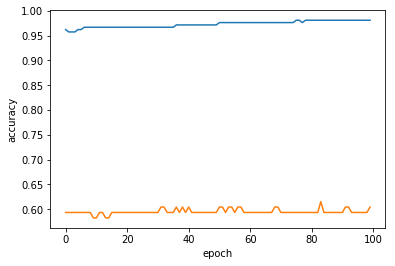

In [239]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

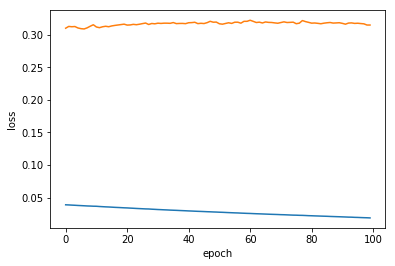

In [240]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()